# Lab #10 - Charges and Potential (Mar 25)

**Student name:** Liam Murray \
**Student number:** 87357539 \
**Partner:** Alexis Bushfield


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Display plots inline
%matplotlib inline

## Section 1: Familiarize
In this stage we get familiar with the equipment, the analysis procedure, and to get a clear big-picture view of the experiment. This will help the rest of the experiment go more smoothly and you will be able to make informed decisions.

### Experimental Goal 🎯:
>Perform an empirical investigation of the electric potential for simple charge distributions with minimal guidance or structure from the instructional team.

>Explore the setup and decide which features of the potential warrant your careful investigation.
Use the fitting and model comparison techniques developed in previous labs to determine the best models representing  different regions or features of the potentials. 

>Use your judgement to decide what information to include in your logbook in order to fully describe your work on this experiment. No rubric is supplied for this lab.


### Familiarize: Question
This is the start of your big-picture investigation. Some questions to ask ourselves are: 
- What is the goal of the experiment?
- What do we need to show to answer the question?
- What’s the final quantity or model that we need to achieve? 

### Familiarize: Discover
Here we get familiar with what we actually need to do. Map out how to get from what we can do with our equipment to the goal. Figure out where the uncertainties come from so we can reduce them as much as possible. In this process we will develop a brief measurement strategy to start our investigation. Some questions to ask ourselves are: 
- How does the equipment work? 
- What equations are related to the experimental goal? 
- Can we write our experimental goal in terms of variables that we can measure? 
- Which variables do we control? 
- What are our sources of uncertainty? 
- How do we assign a number of these sources of uncertainty? (quantify by asking what PDF is attributed to that uncertainty)

Often drawing a diagram of the equipment can be useful in figuring out what’s important and how it relates to the calculations we need to do in order to attain our experiment goal. 

### Measurement Plan
1. Place opposite charges along the horizontal axis 10 cm apart ($d = 10 \ \text{cm}$), with equal magnitude and opposite sign.
2. Use the tape measure and grid to record:
    - The Potential (V) at varying distances $r$ from the midpoint.
    - The Potential at varying angles from the axis.
3. Ensure that $r>>d$, starting with $r=25 \ \text{cm}$
    - The angle can be calculated using $\theta = \arctan(y/x)$
        - This was instead measured using a Google Chrome Protractor extension, by aligning the crosshair with the arc circumference.
- The uncertainties in our distance measurements came from a standard Rectangular Uncertainty due to the rounding of the simulaiton, though we scaled the value by two magnitudes of ten to account for the human error that occurs when aligning the crosshairs of the meter with the simulations grid.
- The uncertainties in our angle measurements came from a standard rectangular uncertainty due to the rounding of the simulation, though we scaled it by a magnitude of ten to account for the angle discrepencies from human error.


<center>
<img src="Setup.png" alt="Experimental Setup Image" style="max-width:30%"> <br>
A screenshot of our experimental setup.
</center>

**Measurement Plan for Round 3**
1. Using a 20cm x 20cm square, we measured in 10cm increments starting from 20 cm from the centre up to 200cm using a diagonal at 40 degrees.
2. We measured the Equipotential using diagonal squares. Since the distance in both $\hat{x}, \hat{y}$ are equal, we can calculate $r = \sqrt{x^2 + y^2} \hat{r}$.
    - Uncertainties in this measurement were calculated using a rectangular PDF due to the rounding within the simulation. Because measurements were aligned with the crosshairs and grid, we assumed that the human error was negligable.


## Section 2: Investigate
This is the body of our experiment. We will iterate the following until we run out of time. At the end of each iteration we will try to make sense of our data in order to make an informed decision on how best to improve. 

#### Investigate: Measure and Analyze
Here we collect the data and run our analysis. Thanks to our spreadsheets, we can often do the analysis in real time and make on-the-fly decisions on how to best proceed. We will be mindful when we set up our spreadsheet to accommodate additional data. Some questions to ask ourselves when writing in our lab books are: 
- What did we actually do? 
- Did anything unexpected go wrong? 
- What happened? 
- Any qualitative observations on either our data or analysis? 
- How did the trends in our plots change as a result? 
- How did our uncertainty change as a result?

## Distance Results

Parameter #1: 1.122709e+04 ± 2.5e+02, Relative uncertainty: 2.195422058747732
Parameter #2: 2.042414e+00 ± 6.5e-03, Relative uncertainty: 0.316747273269506


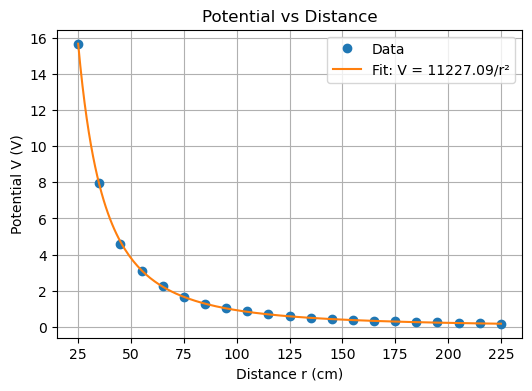

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load distance data
distance_data = np.loadtxt("Distance.csv", delimiter=",", skiprows=1)
r_vals = distance_data[:, 0]
V_vals = distance_data[:, 1]

# Model: V = a / r^2
def potential_model(r, a,b):
    return a / r**b

params, covariance_matrix = curve_fit(potential_model, r_vals, V_vals)
parameter_errors = np.sqrt(np.diag(covariance_matrix))
for i in range(len(params)):
    print(f'Parameter #{i+1}: {params[i]:.6e} ± {parameter_errors[i]:.1e}, Relative uncertainty: {100*(parameter_errors[i]/params[i])}')
a_fit = params[0]
b_fit = params[1]
model_x=np.linspace(np.min(r_vals), np.max(r_vals), 200)
# Plot
plt.figure(figsize=(6, 4))
plt.plot(r_vals, V_vals, 'o', label='Data')
plt.plot(model_x, potential_model(model_x, a_fit, b_fit), '-', label=f'Fit: V = {a_fit:.2f}/r²')
plt.xlabel("Distance r (cm)")
plt.ylabel("Potential V (V)")
plt.title("Potential vs Distance")
plt.grid(True)
plt.legend()
plt.show()

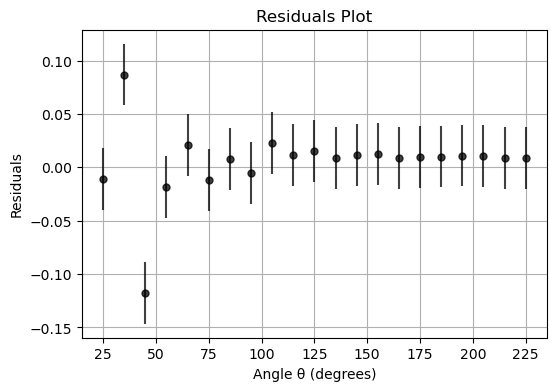

Chisq 1.6307


In [3]:

residual = V_vals - potential_model(r_vals,*params)
x_var = r_vals
y_uncertainty = 0.0005/np.sqrt(3) * 100
# Plot the residuals

# Add grid lines, titles, and axis labels.
plt.figure(figsize=(6,4))
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel("Angle θ (degrees)")  # x-axis label
plt.ylabel("Residuals")  # y-axis label
plt.title("Residuals Plot")  # Plot title

# Set the axis limits for the residuals plot
# ymin_r=-0.5
# ymax_r=0.5
# plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
# plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

ndof = len(x_var) - len(params) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

## Angle Results

Parameter #1: 7.143873e-01 ± 3.2e-03, Relative uncertainty: 0.443480625364671
Parameter #2: 1.008600e+00 ± 8.3e-03, Relative uncertainty: 0.8278408493440983
Parameter #3: 4.360563e-02 ± 1.3e-02, Relative uncertainty: 29.762185215983738


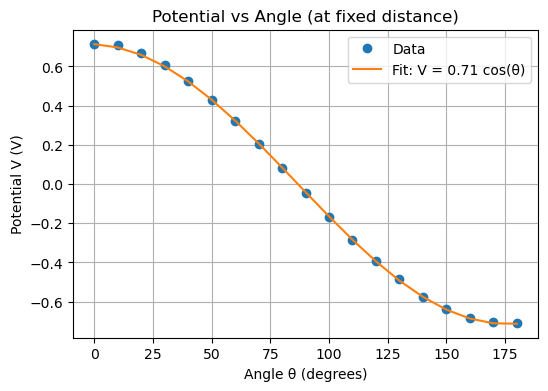

In [4]:
# Load angular data
angular_data = np.loadtxt("Angle.csv", delimiter=",", skiprows=1)
theta_deg = angular_data[:, 0]  # angle in degrees
V_theta = angular_data[:, 1]    # potential in volts

# Convert degrees to radians for fitting
theta_rad = np.radians(theta_deg)

# Define model: V = A * cos(theta)
def angular_model(theta, A,B,C):
    return A * np.cos(B*theta+C)

# Fit the model to data
params_theta, covariance_matrix = curve_fit(angular_model, theta_rad, V_theta)
parameter_errors = np.sqrt(np.diag(covariance_matrix))
for i in range(len(params_theta)):
    print(f'Parameter #{i+1}: {params_theta[i]:.6e} ± {parameter_errors[i]:.1e}, Relative uncertainty: {100*(parameter_errors[i]/params_theta[i])}')
A_fit = params_theta[0]
B_fit = params_theta[1]
C_fit = params_theta[2]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(theta_deg, V_theta, 'o', label='Data')
plt.plot(theta_deg, angular_model(theta_rad, A_fit, B_fit, C_fit), '-', label=f'Fit: V = {A_fit:.2f} cos(θ)')
plt.xlabel("Angle θ (degrees)")
plt.ylabel("Potential V (V)")
plt.title("Potential vs Angle (at fixed distance)")
plt.grid(True)
plt.legend()
plt.show()

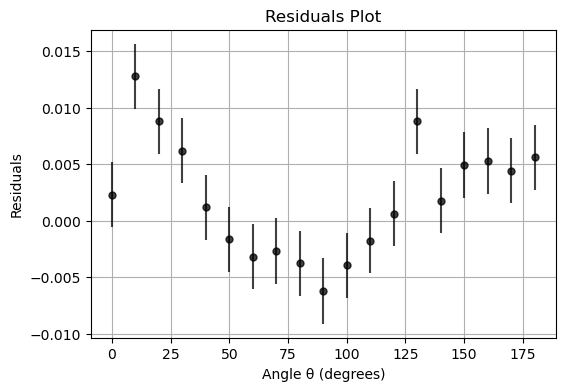

Chisq 4.4925


In [5]:

residual = V_theta - angular_model(theta_rad,*params_theta)
x_var = theta_deg
y_uncertainty = 0.0005/np.sqrt(3) * 10
# Plot the residuals

# Add grid lines, titles, and axis labels.
plt.figure(figsize=(6,4))
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel("Angle θ (degrees)")  # x-axis label
plt.ylabel("Residuals")  # y-axis label
plt.title("Residuals Plot")  # Plot title

# Set the axis limits for the residuals plot
# ymin_r=-0.5
# ymax_r=0.5
# plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
# plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

ndof = len(x_var) - len(params_theta) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

Parameter #1: 4.697016e+05 ± 1.6e+04, Relative uncertainty: 3.371994640350068
Parameter #2: 2.942320e+00 ± 9.9e-03, Relative uncertainty: 0.3373826749224069


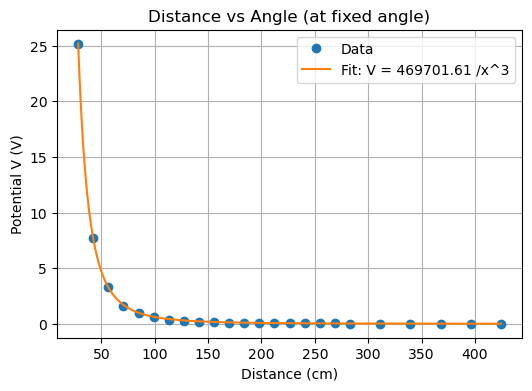

In [6]:

# Load angular data
angular_data = np.loadtxt("4 Charge Data.csv", delimiter=",", skiprows=1)
dist_xy = angular_data[:, 0]  # angle in degrees
V_quad = angular_data[:, 1]    # potential in volts

dist_r = np.sqrt(2*(dist_xy**2))

# Define model: V = A * cos(theta)
def quad_model(x,A,B):
    return A /(x**B)

# Fit the model to data
params_theta, covariance_matrix = curve_fit(quad_model, dist_r, V_quad)
parameter_errors = np.sqrt(np.diag(covariance_matrix))
for i in range(len(params_theta)):
    print(f'Parameter #{i+1}: {params_theta[i]:.6e} ± {parameter_errors[i]:.1e}, Relative uncertainty: {100*(parameter_errors[i]/params_theta[i])}')
A_fit = params_theta[0]
B_fit = params_theta[1]
# C_fit = params_theta[2]
model_r = np.linspace(np.min(dist_r), np.max(dist_r), 1000)
# Plot
plt.figure(figsize=(6, 4))
plt.plot(dist_r, V_quad, 'o', label='Data')
plt.plot(model_r, quad_model(model_r, A_fit, B_fit), '-', label=f'Fit: V = {A_fit:.2f} /x^3')
plt.xlabel("Distance (cm)")
plt.ylabel("Potential V (V)")
plt.title("Distance vs Angle (at fixed angle)")
plt.grid(True)
plt.legend()
plt.show()

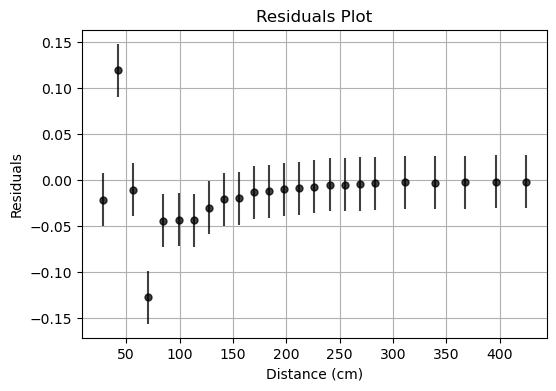

Chisq 2.2415


In [7]:

residual = V_quad - quad_model(dist_r,*params_theta)
x_var = dist_r
y_uncertainty = 0.05/np.sqrt(3)
# Plot the residuals

# Add grid lines, titles, and axis labels.
plt.figure(figsize=(6,4))
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel("Distance (cm)")  # x-axis label
plt.ylabel("Residuals")  # y-axis label
plt.title("Residuals Plot")  # Plot title

# Set the axis limits for the residuals plot
# ymin_r=-0.5
# ymax_r=0.5
# plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
# plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

ndof = len(x_var) - len(params_theta) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

## Summary of Day 1
Overall, our results from Round 1 and 2 are high quality measurements of the Potential as a function of distance and angle from a dipole and quadrangle.

Plan for improvement:
1. Take a larger range of experimental data to confirm sinusoidal and exponential behaviours.
2. Refine a model for uncertainties in the experiment.

Our final models were:
| Variable               | Model |
| --------------------- | ---------------------- |
| Distance (both dipole and quadrangle)                                  | $\frac{A}{r^b}$                              |
| Angle                                      | $A \cos(B \theta + C)$                       |


**For our exponential model**
| Parameter          | Value                | Relative Uncertainty |
| --------- | ------------------ | -------------------- |
| A                 | 1.12e4 ± 2.5e2                   | 2.20%                                    |
|B|2.043 ± 6.5e-3|0.32%|

**For our sinusoidal model** 
| Parameter         | Value                | Relative Uncertainty |
| --------- | ----------------- | -------------------- |
| A                 | 0.71 ± 3.2e-3                      |  0.44%                                   |
| B                 | 1.00 ± 8.3e-3                      | 0.83%                                    |
| C                 | 4.36e-02 ± 1.3e-2                  | 29.76%*                                   |

*We hypothesize this uncertainty is due to the sinusoidal nature of the function, which was bring uncertainty due to its periodic behaviour.

**For our quadrangle model**
| Parameter      | Value                | Relative Uncertainty |
| --------- | -------------- | -------------------- |
| A                 | 4.70e5 ± 1.6e4               | 3.37%                                    |
| B                 | 2.94 ± 9.9e-3             | 0.34%                                    |

**$\chi^2$ Analysis of Models**

| Model    | $\chi^2$                                                                                            | Notes |
| -------------------------- | -------- | --------------------------------------------------------------------------------------------------- |
| $\frac{A}{r^b}$                                      | 1.6307           | The model's residuals converge, though it makes a very good visual fit for the data, and the b-parameter agrees with electrostatic equations as its $\approx 2$.                                                                                                                   |
| $A \cos(B \theta + C)$                               | 4.4925           | The model has a good distribution of residuals, and fits the model very well when assessed visually                                                                                                    |
| $\frac{A}{r^b}$ (Quadrangle)                                     | 2.2415           | The model agrees with the data, across a range of 20 to 400+ cm, and the b-parameter agrees with electrostatic equations as its $\approx 3$                                                                                                                                        |


**Comparison with Aaliyah and Mia** \
Their methodology was similar to ours, however they preformed their distance measurements at an angle of 45 degrees. Their angular measurements were also taken using a different range of angles. Their models were similar to ours, with good $\chi^2$ and visual agreement.

### Experimental Summary
We achieved the experimental goal to:
> Investigate interesting aspects of the electric potential at positions relative to the center of simple charge distributions, and develop mathematical models of the potentials. 

We did this by finding multiple models that agree with our data and electrostatic equations to analyze our data. Our analytical results are supported by qualitative agreeance with the fit of our graphs.

We succeeded the learning goals to:
>Perform an empirical investigation of the electric potential for simple charge distributions with minimal guidance or structure from the instructional team.
Explore the setup and decide which features of the potential warrant your careful investigation.
    
   - We collaborated and successfully completed the investigation.

>Use the fitting and model comparison techniques developed in previous labs to determine the best models representing  different regions or features of the potentials.
   
   - We successfully used these techniques to fit and analyze the data we collected.

>Use your judgement to decide what information to include in your logbook in order to fully describe your work on this experiment. No rubric is supplied for this lab.

   - We collaborated and made informed decisions of what to include and discuss.

